Wine Quality Prediction Decision Tree


In [194]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [195]:
wdf = pd.read_csv('winequality-red.csv')

In [196]:
wdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [197]:
wdf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [198]:
wdf.info


<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [199]:
wdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [200]:
#sns.pairplot(wdf)

<AxesSubplot:>

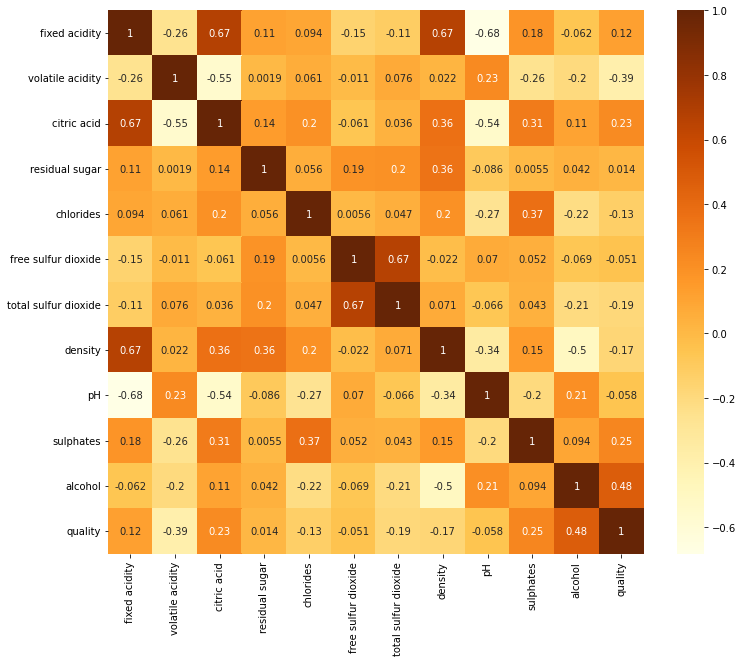

In [201]:
corr = wdf.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot = True, ax=ax ,cmap='YlOrBr')

In [202]:
wdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [203]:
x = wdf[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = wdf['quality']

In [204]:
from imblearn.over_sampling import SMOTE

In [205]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [206]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [207]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=10)

In [210]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
305,10.3,0.53,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5
812,10.8,0.45,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1393,8.0,0.52,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2
1344,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0
527,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4
1149,10.0,0.35,0.47,2.0,0.061,6.0,11.0,0.99585,3.23,0.52,12.0


In [211]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1518,7.4,0.470,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
1246,7.4,0.740,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4
1343,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
428,9.1,0.520,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3
...,...,...,...,...,...,...,...,...,...,...,...
174,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5
387,8.3,0.660,0.15,1.9,0.079,17.0,42.0,0.99720,3.31,0.54,9.6
1560,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9
846,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8


In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
ln = DecisionTreeClassifier()

In [214]:
ln.fit(x_train,y_train)

DecisionTreeClassifier()

In [215]:
#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])

In [216]:
#coeff_df

In [217]:
pred = ln.predict(x_test)

Text(0, 0.5, 'predicted quality')

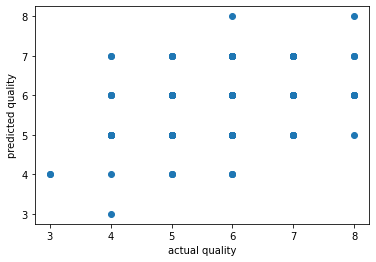

In [218]:
plt.scatter(y_test,pred)
plt.xlabel("actual quality")
plt.ylabel("predicted quality")

In [219]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [220]:
model.fit(x_train,y_train)

LinearRegression()

In [221]:
wdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [222]:
# inp_data = {'fixed acidity':7.3, 
#             'volatile acidity':0.65, 
#             'citric acid':0.0, 
#             'residual sugar':1.2,
#             'chlorides':0.065, 
#             'free sulfur dioxide':15.0, 
#             'total sulfur dioxide':21.0, 
#             'density':0.9946,
#             'pH':3.4, 
#             'sulphates':0.47,
#             'alcohol':10
# }
# inp_df = pd.DataFrame([inp_data])
# prediction = ln.predict(inp_df)
# print('Predicted quality:', prediction[0])
# if prediction >= 5:
#     print("good quality wine")
# else:
#     print('bad quality wine')

Predicted quality: 5
good quality wine


In [223]:
wdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [226]:

fixed_acidity = float(input("Enter fixed acidity: "))
volatile_acidity = float(input("Enter volatile acidity: "))
citric_acid = float(input("Enter citric acid: "))
residual_sugar = float(input("Enter residual sugar: "))
chlorides = float(input("Enter chlorides: "))
free_sulfur_dioxide = float(input("Enter free sulfur dioxide: "))
total_sulfur_dioxide = float(input("Enter total sulfur dioxide: "))
density = float(input("Enter density: "))
pH = float(input("Enter pH: "))
sulphates = float(input("Enter sulphates: "))
alcohol = float(input("Enter alcohol: "))


input_data = {
    'fixed acidity': fixed_acidity,
    'volatile acidity': volatile_acidity,
    'citric acid': citric_acid,
    'residual sugar': residual_sugar,
    'chlorides': chlorides,
    'free sulfur dioxide': free_sulfur_dioxide,
    'total sulfur dioxide': total_sulfur_dioxide,
    'density': density,
    'pH': pH,
    'sulphates': sulphates,
    'alcohol': alcohol
}

inp_df = pd.DataFrame([input_data])

prediction = ln.predict(inp_df)
print('Predicted quality:', prediction[0])

if prediction >= 5:
    print("Good quality wine")
else:
    print("Bad quality wine")


Predicted quality: 5
Good quality wine
